In [10]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [11]:
def sigmoid(x): # Returns values that sums to one.
 return 1 / (1 + np.exp(-x))
#derivative of sigmoid
def der_sig(x):
 return x*(1 - x)
def accuracy(y_pred, y_true):
 acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
 return acc.mean()
def cost(y, t):
 return ((t - y)**2).sum() / (2*y.size)


In [12]:
X = np.array([[1, 1],
 [1, 0],
 [0, 1],
 [0, 0]])
t = np.array([[0], 
 [1],
 [1],
 [0]])
lr = 0.1
hidden_size = 2
output_size = 1
results = pd.DataFrame(columns=["mse", "accuracy"])

In [13]:
num_data, input_size = X.shape

In [14]:
# initializing weight for the hidden layer
W1 = np.random.random(size=(input_size, hidden_size)) 
# initializing weight for the output layer
W2 = np.random.random(size=(hidden_size , output_size)) 

In [15]:
print("W1 = ", W1, "\n\n\nW2 = ", W2)

W1 =  [[0.47301178 0.27336298]
 [0.94857189 0.70721473]] 


W2 =  [[0.06753717]
 [0.25359545]]


In [16]:
epoch = 10000
for n in range(epoch):
 
 #print("\nInput ", n+1)
 
 
 #feed foward
 #input to hidden
 hidden_in = np.dot(X, W1) 
 hidden_out = sigmoid(hidden_in)
 #print("\nhidden out = ", hidden_out)
 
 #hidden to output
 output_in = np.dot(hidden_out, W2) 
 output_out = sigmoid(output_in)
 #print("\noutput out = ", output_out)
 
 total_cost = cost(output_out, t)
 BPN_error = t - output_out
 #print("\nBPN error = ", BPN_error)
 
 acc = accuracy(output_out, t)
 results=results.append({"mse":total_cost, "accuracy":acc},ignore_index=True )
 
 #BACKPROPAGATION
 
 
 
 output_error = (-BPN_error) * der_sig(output_out)
 output_delta = np.dot(output_out.T, output_error ) 
 #print("\nOutput delta = ", output_delta)
 
 hidden_error = np.dot(output_error, W2.T)
 #print("\nHidden error = ", hidden_error)
 
 hidden_delta = np.dot(X.T, hidden_error * der_sig(hidden_out))
 #print("\nHidden delta = ", hidden_delta)
 
 
 # update weights
 #W2 += lr * hidden_out.T.dot(output_delta)
 W2 -= lr * output_delta
 #print("\nW2 = ", W2)
 #b2 += np.sum(output_delta,axis=0,keepdims=True) * lr
 
 #W1 += lr * np.dot(hidden_delta.T, X)
 W1 -= lr * hidden_delta
 #print("\nW1 = ", W1)
 #b1 += lr * hidden_delta
 #print("---------------------------")
 
print("Final output weights = ", W2)
print("\nFinal input weights = ", W1)


Final output weights =  [[-0.10220644]
 [ 0.08385185]]

Final input weights =  [[-0.08599858  1.17627696]
 [ 0.79770223  1.36404159]]


<AxesSubplot: >

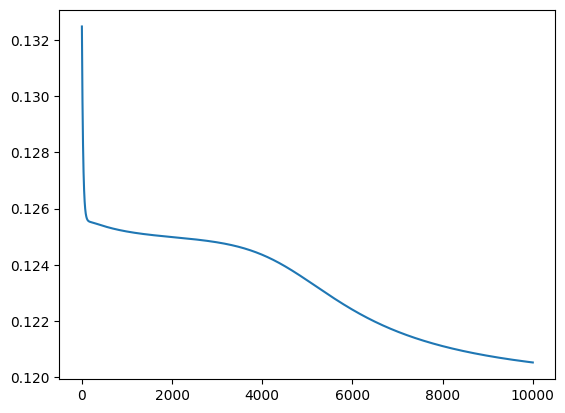

In [9]:
results.mse.plot()